[ 5.    5.01  5.02 ... 89.96 89.97 89.98]
[10.   10.01 10.02 ... 79.97 79.98 79.99]
[10.   10.01 10.02 ... 79.97 79.98 79.99]


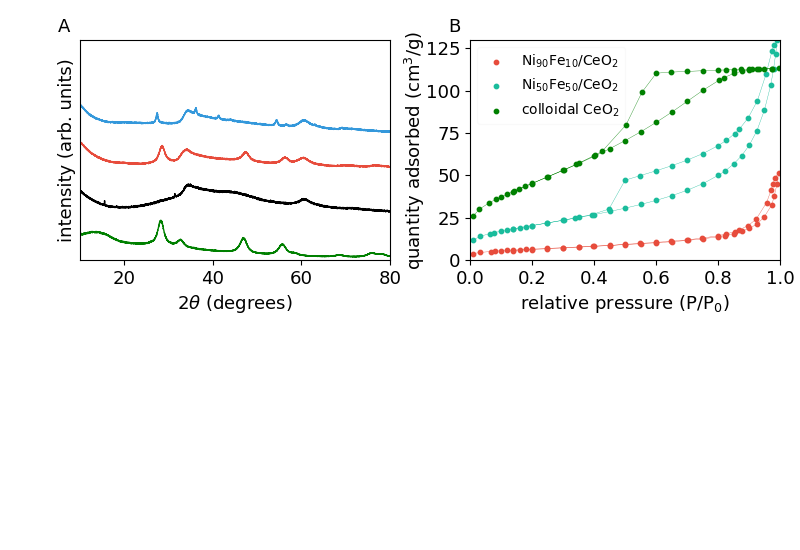

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

length = 8
height = 5.5

axes_l1 = 3.1
axes_w1 = 2.2
axes_w2 = 1.7

x_offset = 0.8 
y_offset = 0.6

label_font = 13
tick_font = 13
legend_font = 10

linewidth = 1

fig = plt.figure(figsize=(length, height))


axes1 = fig.add_axes([(x_offset)/length, \
                      (2*y_offset+1*axes_w2)/height, axes_l1/(length), axes_w1/(height)])  # left
axes2 = fig.add_axes([(2*x_offset+axes_l1)/length, \
                      (2*y_offset+1*axes_w2)/height, axes_l1/(length), axes_w1/(height)])  # right


for axes in fig.axes:
    axes.set_xticks([]) 
    axes.set_yticks([])

# axis 1 - XRD data

filenames=[['XRD/CeO2_coll_ppt_100C_dryed_O2_standard.xrdml','CeO$_2$','green']]

offset = 0
offset_increment = 50 

for filename, label, color in filenames:
    data = xrd.read_xrdml(filename)
    
    two_theta = data['2Theta']  # 2theta values
    intensity = data['data']  # intensity

    new_intensity = intensity*500 + offset
    
    axes1.plot(two_theta, new_intensity, label=label, linewidth=linewidth, color=color)
    
    offset += offset_increment

filenames=[['XRD/Ni90Fe10_Ni_BB_Dtex.xy','Ni$_{90}$Fe$_{10}$','black', 0],\
           ['XRD/Ni90Fe10_CeO2_BB_Dtex.xy','Ni$_{90}$Fe$_{10}$/CeO$_2$', '#e74c3c' , 25000],\
            ['XRD/Ni90Fe10_TiO2_BB_Dtex.xy','Ni$_{90}$Fe$_{10}$/TiO$_2$', '#3498db', 40000]]


for filename, label, color, offset in filenames:
    data = np.loadtxt(filename)
    
    print(data[:,0])
    two_theta = data[:,0]  # 2theta values
    intensity = data[:,1]  # intensity

    new_intensity = intensity + offset
    
    axes1.plot(two_theta, new_intensity, label=label, linewidth=linewidth, color=color)
    

axes1.xaxis.set_major_locator(ticker.AutoLocator())
axes1.set_xlim(10,80)
axes1.set_ylim(-2,90000)

axes1.tick_params(axis='x', which='major', labelsize=tick_font)

axes1.set_xlabel(r'2$\theta$ (degrees)',fontsize=label_font)
axes1.set_ylabel('intensity (arb. units)',fontsize=label_font, labelpad=3)


# axis 2 - BET data

filenames=[['BET/Ni90Fe10_CeO2.txt','Ni$_{90}$Fe$_{10}$/CeO$_2$','#e74c3c'],\
           ['BET/Ni50Fe50_CeO2.txt','Ni$_{50}$Fe$_{50}$/CeO$_2$','#1abc9c'],\
           ['BET/coll_CeO2.txt','colloidal CeO$_2$','green']]

for filename, label, color in filenames:
    data = pd.read_csv(filename,delimiter='\t',decimal='.',skiprows=1,header=None,dtype=float)
    
    relative_pressure = np.array(data.iloc[:,0]) # relative pressure
    quantity_adsorbed =np.array(data.iloc[:,2]) # quantity adsorbed
    
    axes2.scatter(relative_pressure,quantity_adsorbed,\
             label=label,s = 10, zorder = 1, color=color)
    axes2.plot(relative_pressure,quantity_adsorbed,\
             zorder = 0, linewidth = linewidth/4, color=color)


axes2.xaxis.set_major_locator(ticker.AutoLocator())
axes2.yaxis.set_major_locator(ticker.AutoLocator())
axes2.set_xlim(0,1.0)
axes2.set_ylim(0,130)
axes2.tick_params(axis='both', which='major', labelsize=tick_font)  # For major ticks
axes2.legend(fontsize=legend_font, framealpha=0.1)

axes2.set_xlabel('relative pressure (P/P$_0$)',fontsize=label_font)
axes2.set_ylabel('quantity adsorbed (cm$^3$/g)',fontsize=label_font, labelpad=-1)

axes1.text(-0.07, 1.1, 'A', ha='left', fontsize=label_font, va='top', transform=axes1.transAxes)
axes2.text(-0.07, 1.1, 'B', ha='left', fontsize=label_font, va='top', transform=axes2.transAxes)

plt.savefig('fig_xrd_bet.pdf',dpi=300, bbox_inches='tight')
plt.show()